## Prior and Posterior predictive distributions

In [16]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
prior=CmdStanModel(stan_file='model_prior.stan')
stan_samples = prior.sample(fixed_param=True, iter_sampling=1000)


INFO:cmdstanpy:compiling stan file /home/lab3/model_prior.stan to exe file /home/lab3/model_prior
INFO:cmdstanpy:compiled model executable: /home/lab3/model_prior
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


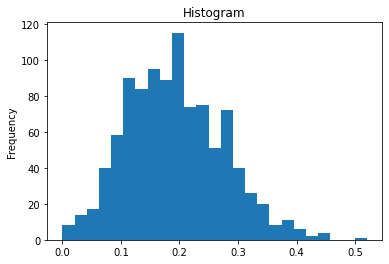

In [17]:
df = stan_samples.draws_pd()
ratio = df["y"]/df["N"]
ratio.plot.hist(bins = 25)
plt.title("Histogram")
plt.show()

In [18]:
ratio.mean()

0.19486000000000003

Calculated mean of a ratio is consistent with prior knowledge. The difference is around 0.05 percentage point.


## Modeling posterior and posterior predictive distribution


In [36]:
post=CmdStanModel(stan_file='model_post.stan')
samples = post.sample(data={"N":50, "y":7})
df2 = samples.draws_pd()
df2

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-47.7117,0.605465,1.067110,1.0,3.0,0.0,48.5098,0.256079,13.0
1,-45.6532,0.992107,1.067110,1.0,3.0,0.0,47.6590,0.156790,8.0
2,-45.6388,0.867804,1.067110,2.0,3.0,0.0,46.4950,0.182112,8.0
3,-45.7120,0.978372,1.067110,1.0,1.0,0.0,45.7174,0.189196,8.0
4,-45.7120,0.761542,1.067110,1.0,3.0,0.0,46.4981,0.189196,8.0
...,...,...,...,...,...,...,...,...,...
3995,-45.5902,0.991876,0.950099,1.0,3.0,0.0,46.6968,0.167871,7.0
3996,-46.0793,0.926534,0.950099,2.0,3.0,0.0,46.1707,0.135002,7.0
3997,-46.3026,0.956101,0.950099,1.0,1.0,0.0,46.3577,0.128344,9.0
3998,-45.8995,1.000000,0.950099,2.0,3.0,0.0,46.2261,0.141775,7.0


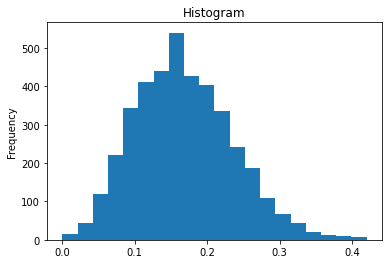

In [30]:
ratio2 = df2["y_pred"]/50
ratio2.plot.hist(bins = 20)
plt.title("Histogram")
plt.show()

In [38]:
import arviz as az
mean_y_pred = ratio2.mean()
density_y_pred = az.hdi(np.array(ratio2), hdi_prob=0.94)
ratio3 = df2["p"]
mean_p = ratio3.mean()
density_p = az.hdi(np.array(ratio3), hdi_prob=0.94)

print(f"Expected value of p: {mean_p:.3f}")
print(f"94% HDI of p: [{density_p[0]:.3f}, {density_p[1]:.3f}]")
print(f"Expected value of predicted ratio: {mean_y_pred:.3f}")
print(f"94% HDI of predicted ratio: [{density_y_pred[0]:.3f}, {density_y_pred[1]:.3f}]")


Expected value of p: 0.171
94% HDI of p: [0.107, 0.243]
Expected value of predicted ratio: 0.170
94% HDI of predicted ratio: [0.060, 0.280]


In [43]:
prob_ratio_lower_p_avg = (ratio2 < 0.2).mean()
print("probailty={0}".format(prob_ratio_lower_p_avg))

probailty=0.64
